In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import scipy.interpolate
from scipy.ndimage import gaussian_filter
import tifffile
import seaborn as sns

from IPython.display import HTML
import matplotlib.animation as animation
from tqdm.notebook import tqdm, trange
from scipy.optimize import curve_fit
#import gaussian
from skimage.filters import gaussian
from scipy.interpolate import RectBivariateSpline
from PIL import Image
import itertools
from utils import graph_utils as gu


In [2]:

PROJECT_PATH = 'C:/Users/amityu/DataspellProjects/gel_sheets/'
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
#movie = 'Control'
#movie = '130721'
#movie ='140721'
#movie ='150721'
#movie ='100621'
#movie ='130721_CCA60_RAW'
#movie ='280523 AM100 568'
movie = 'cca120'
ADD_PATH = os.path.join(PROJECT_PATH, "add_data/")


MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'

In [3]:
gel = np.load(MOVIE_PATH + 'np/gel_norm.npy')

In [4]:
membrane = np.load(MOVIE_PATH + 'np/membrane.npy')
surface = np.load(MOVIE_PATH + 'np/height.npy')
mask = ~(np.bitwise_or(np.isnan(surface), np.isnan(membrane)))
membrane[np.isnan(membrane)] = 0
surface[np.isnan(surface)] = 0
membrane = membrane.astype(int)
surface = surface.astype(int)


C:\Users\amityu\AppData\Local\Temp\ipykernel_25440\2376913203.py:2: RuntimeWarning: invalid value encountered in cast
  surface = np.load(MOVIE_PATH + 'np/height.npy').astype(int)


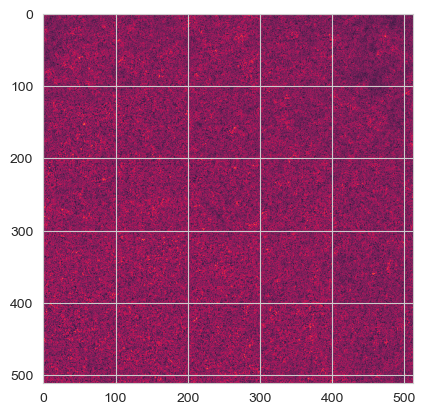

In [43]:
#surface[surface>=gel.shape[1]] = gel.shape[1]-1
intensity = np.zeros(surface.shape)

for t,i,j in itertools.product(range(gel.shape[0]),range(gel.shape[2]), range(gel.shape[3])):
    intensity[t,i,j] = gel[t, membrane[t,i,j]  ,i,j]

plt.imshow(intensity[10])
plt.show()

In [44]:
#make animation for intensity with imshow and colorbar, and save it

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_title('Intensity')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
ax.set_xlim(0, intensity.shape[2])
ax.set_ylim(0, intensity.shape[1])

im = ax.imshow(intensity[0], cmap='jet', vmin=0, vmax=np.nanmax(intensity))
fig.colorbar(im)
def animate(i):
    im.set_data(intensity[i])
    ax.set_title('Intensity at t = ' + str(i))
    return im

ani = animation.FuncAnimation(fig, animate, frames=intensity.shape[0], interval=1000, blit=False)
ani.save(GRAPH_PATH + 'correlation/plate_intensity/' +movie + 'membrane_intensity.mp4', writer='ffmpeg', fps=1)
plt.close()


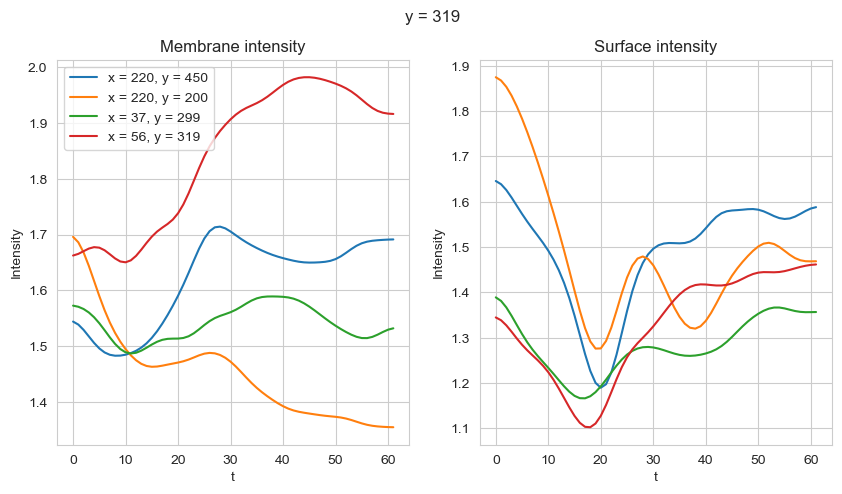

In [80]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
X= [220,220 ,37,56]
Y = [450,200,299,319]
for x,y in zip(X, Y):
    ax1.plot(membrane_intensity[:, y, x], label='x = ' + str(x) + ', y = ' + str(y))
    ax2.plot(surface_intensity[:, y, x], label='x = ' + str(x) + ', y = ' + str(y))
ax1.set_title('Membrane intensity')
ax2.set_title('Surface intensity')
ax1.set_xlabel('t')
ax2.set_xlabel('t')
ax1.set_ylabel('Intensity')
ax2.set_ylabel('Intensity')
ax1.legend()
plt.suptitle('y = ' + str(y))
plt.show()



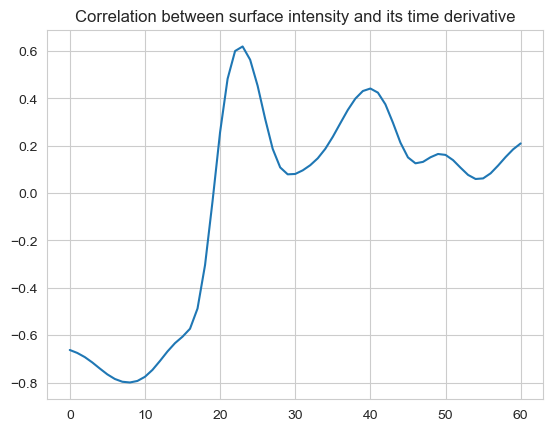

In [88]:

surface_intensity_der = surface_intensity[1:] - surface_intensity[:-1]
c = np.zeros(len(surface_intensity_der))
for t in range(len(surface_intensity_der)):
    c[t] = np.corrcoef(surface_intensity_der[t].flatten(), surface_intensity[t].flatten())[0,1]
plt.plot(c)
plt.title('Correlation between surface intensity and its time derivative')
plt.show()


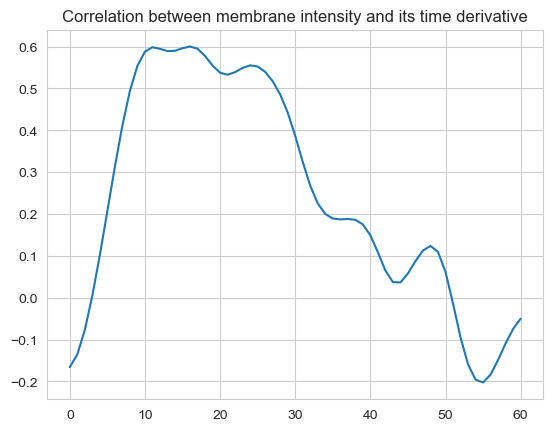

In [89]:

membrane_intensity_der = membrane_intensity[1:] - membrane_intensity[:-1]
c = np.zeros(len(surface_intensity_der))
for t in range(len(surface_intensity_der)):
    c[t] = np.corrcoef(membrane_intensity_der[t].flatten(), membrane_intensity[t].flatten())[0,1]
plt.plot(c)
plt.title('Correlation between membrane intensity and its time derivative')
plt.show()


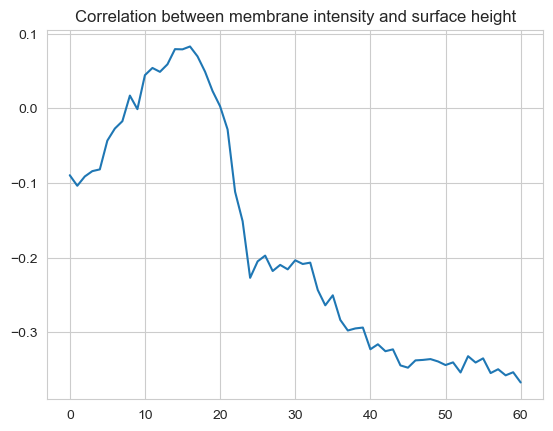

In [92]:
#correlation bettwen membrane intensity and surface
c = np.zeros(len(surface_intensity_der))
for t in range(len(surface_intensity_der)):
    c[t] = np.corrcoef(membrane_intensity[t].flatten(), surface [t].flatten())[0,1]
plt.plot(c)
plt.title('Correlation between membrane intensity and surface height')
plt.show()



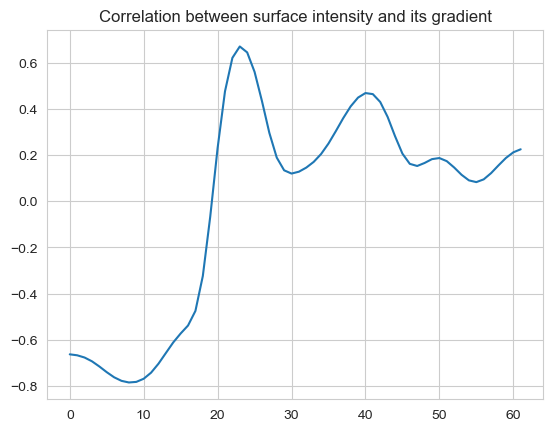

In [10]:
# correlation between surface intensity to its gradient
surface_intensity_der = np.gradient(surface_intensity, axis=0)
c = np.zeros(len(surface_intensity_der))
for t in range(len(surface_intensity_der)):
    c[t] = np.corrcoef(surface_intensity_der[t].flatten(), surface_intensity[t].flatten())[0,1]
plt.plot(c)
plt.title('Correlation between surface intensity and its gradient')
plt.show()



In [12]:
# save surface to tif file
for t in range(len(surface)):
    im = Image.fromarray(surface[t].astype(np.uint8))
    im.save(MOVIE_PATH + 'tiff/surface/' + str(t) + '.tif')

In [46]:
gel = np.load(MOVIE_PATH+'np/gel.npy')

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
from matplotlib.widgets import Button
from matplotlib.cm import ScalarMappable
import matplotlib as mpl
from scipy.ndimage import gaussian_filter
mpl.use('TkAgg')

gel_corrected = gel
surface = spike


# Create a dummy 3D numpy array as an example
# Replace this with your actual "surface" array
plot_sigma = 0
# Initialize t, y coordinates
global y,t
t = 0
y = 0

# Function to update the plot
def update_plot():
    global y,t

    h = surface[t]

    ax1.clear()
    ax2.clear()
    img = gel_corrected[t,:,y,:]
    ax1.imshow(img,origin='lower', cmap='coolwarm')
    ax1.set_xlabel('X (Pixels)')
    ax1.set_ylabel('Z (Pixels)')
    ax1.set_title('Gel Corrected by illumination filter \n y=%d'%y)

    ax1.plot(gaussian_filter(h[y,: ],sigma = plot_sigma ), 'y', linestyle='--')
    im= ax2.imshow(h, origin='lower', cmap='coolwarm')
    ax2.hlines(y=y, xmin=0, xmax=h.shape[0], color='b')

    ax2.set_xlabel('X (Pixels)')
    ax2.set_ylabel('Y (Pixels)')
    ax2.set_title('Surface computed \n y=%d'%y)
    fig.suptitle('Segmentation Time=%d ' % t)
    plt.draw()

# Function to handle key presses
def on_key(event):
    global t, y
    if event.key == 'up':
        y = (y + 1) % surface.shape[1]
        update_plot()
    elif event.key == 'down':
        y = (y - 1) % surface.shape[1]
        update_plot()
    elif event.key == 'right':
        t = (t + 1) % surface.shape[0]
        update_plot()
    elif event.key == 'left':
        t = (t - 1) % surface.shape[0]
        update_plot()

# Create a figure and plot the initial surface
fig,(ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
h = surface[0]

sm = ScalarMappable(cmap='coolwarm')
sm.set_array(h)
cbar = plt.colorbar(sm ,ax= ax2)
ax1.clear()
ax2.clear()
img = gel_corrected[t,:,y,:]
ax1.imshow(img,origin='lower', cmap='coolwarm')
ax1.set_xlabel('X (Pixels)')
ax1.set_ylabel('Z (Pixels)')
ax1.set_title('Gel Corrected by illumination filter \n y=%d'%y)

ax1.plot(gaussian_filter(h[y,: ],sigma = plot_sigma ), 'y', linestyle='--')
im= ax2.imshow(h, origin='lower', cmap='coolwarm')
ax2.hlines(y=y, xmin=0, xmax=h.shape[0], color='b')

ax2.set_xlabel('X (Pixels)')
ax2.set_ylabel('Y (Pixels)')
ax2.set_title('Surface computed \n y=%d'%y)
fig.suptitle('Segmentation Time=%d ' % t)
# Connect the key press event to the on_key function
fig.canvas.mpl_connect('key_press_event', on_key)

# Show the plot
plt.show()


In [4]:
from external_files.autocorrelation_and_structure_factor_IK_20220103 import  spatial_autocorr, static_structure_factor, static_structure_factor_radial
surface = np.load(MOVIE_PATH+'np/height.npy')

# A is set to be the x:horizontal coordinates vs height at y=256

# wrong you should analyze in specific time. 
A = surface[:,:,256]
A[np.isnan(A)] = np.nanmean(A)

h,x_lag,y_lag = spatial_autocorr(A, np.arange(surface.shape[1]), np.arange(surface.shape[0]))
                                 

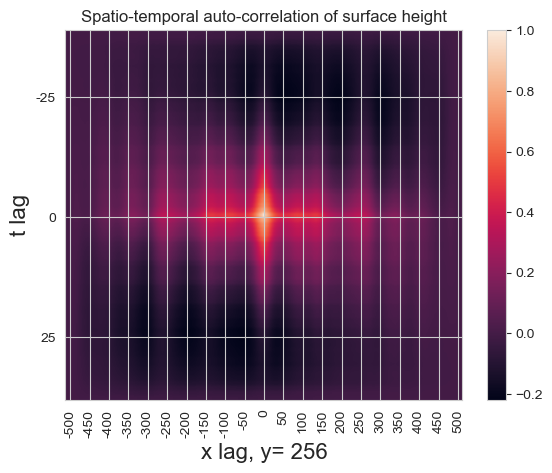

In [57]:



normalization_factor = np.linalg.norm(A-np.mean(A), 'fro')**2
hn = h/normalization_factor
plt.imshow(hn, aspect='auto')
plt.colorbar()
plt.xlabel('x lag, y= 256', fontsize = 16)
plt.xticks(gu.yuval_ticks(x_lag)[0], gu.yuval_ticks(x_lag)[1], rotation = 90)
plt.yticks(gu.yuval_ticks(y_lag,25)[0], gu.yuval_ticks(y_lag,25)[1])
plt.ylabel('t lag', fontsize = 16)
plt.title('Spatio-temporal auto-correlation of surface height')
plt.show()


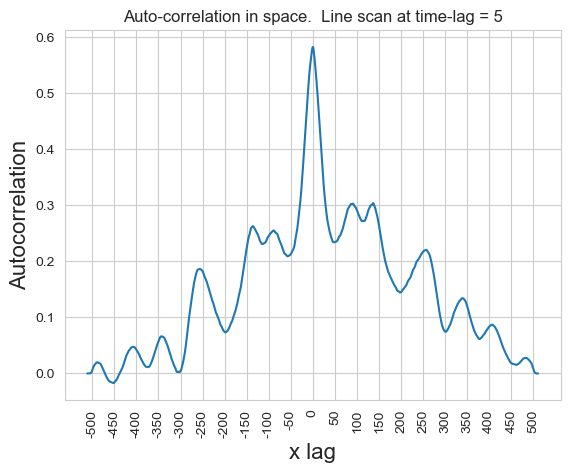

In [58]:
t =5
plt.plot(hn[int(len(hn)/2) + t,:])
plt.title('Auto-correlation in space.  Line scan at time-lag = %d'%t)
plt.xlabel('x lag', fontsize = 16)
plt.xticks(gu.yuval_ticks(x_lag)[0], gu.yuval_ticks(x_lag)[1], rotation = 90)
plt.ylabel('Autocorrelation', fontsize = 16)
plt.show()


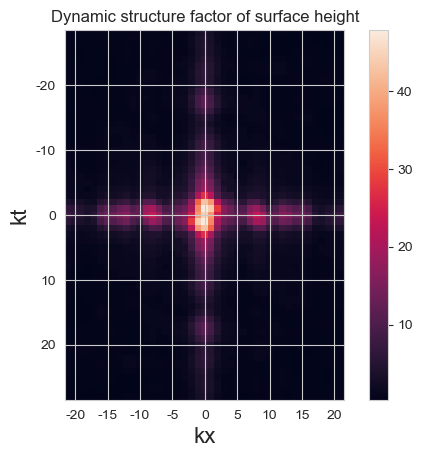

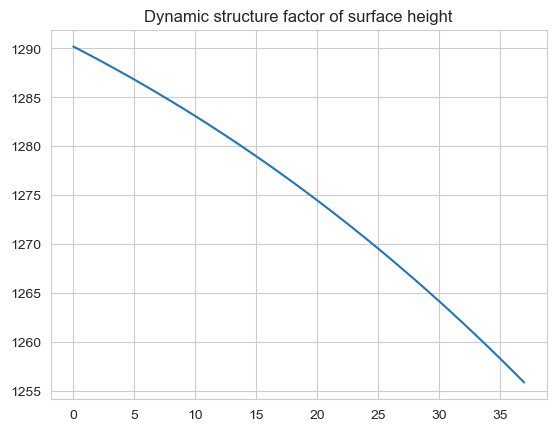

In [43]:

ssf,kx,ky = static_structure_factor(hn, x_lag)
ssf_radial, kr = static_structure_factor_radial(ssf, kx,ky)


plt.imshow(np.sqrt(ssf[10:-10,490:-490]))
plt.colorbar()
plt.xlabel('kx', fontsize = 16)
plt.ylabel('kt' , fontsize = 16)
xticks, xlabels = gu.yuval_ticks(range(-21,21), gap=5)
yticks, ylabels = gu.yuval_ticks(range(-28,28), gap=10)
plt.xticks(xticks, xlabels)
plt.yticks(yticks, ylabels)

plt.title('Dynamic structure factor of surface height')
plt.show()


plt.plot(ssf_radial)
plt.title('Dynamic structure factor of surface height')
plt.show()

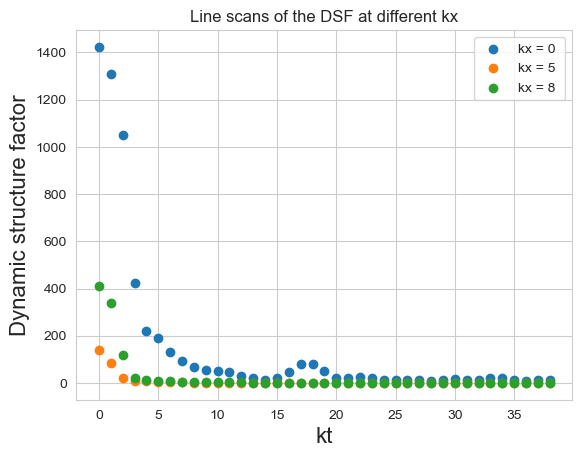

In [44]:
plt.scatter(range(0,39),ssf[38:,512])
plt.scatter(range(0,39),ssf[38:,517])
plt.scatter(range(0,39),ssf[38:,520])
plt.title('Line scans of the DSF at different kx')
plt.xlabel('kt', fontsize = 16)
plt.ylabel('Dynamic structure factor', fontsize = 16)
plt.legend(['kx = 0 ', 'kx = 5', 'kx = 8'])

plt.show()


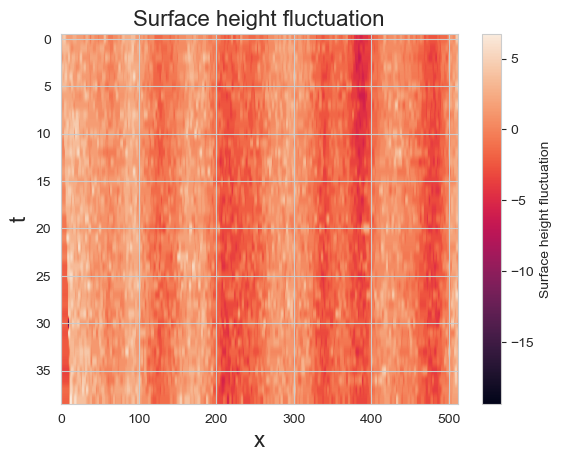

In [64]:
A_ = np.zeros_like(A)
for t in range(len(A)):
    A_[t] = A[t]- np.mean(A[t])
plt.imshow(A_, aspect='auto')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Surface height fluctuation')
plt.xlabel('x', fontsize = 16)
plt.ylabel('t', fontsize = 16)
plt.title('Surface height fluctuation', fontsize = 16)
plt.show()


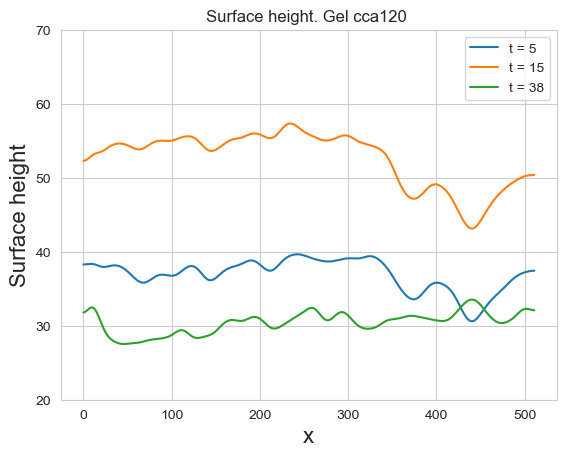

In [7]:
y = 256
surface = np.load(MOVIE_PATH+'np/height.npy')
smoothed = gaussian_filter(surface[:,:,256], sigma=7)
for t in [5,15,38]:
    plt.plot(smoothed[t,:])
    
    plt.xlabel('x', fontsize = 16)
    plt.ylabel('Surface height', fontsize = 16)
    plt.ylim([20,70])
plt.legend(['t = 5', 't = 15', 't = 38'])
plt.title('Surface height. Gel %s '%movie)
plt.show()



In [10]:
from utils.graph_utils import values_3d
gel = np.load(MOVIE_PATH+'np/gel_norm.npy', mmap_mode='r')
surface = np.load(MOVIE_PATH+'np/height.npy')
membrane = np.load(MOVIE_PATH+'np/membrane.npy')
intensity_at_surface  = values_3d(gel, surface)
intensity_at_membrane = values_3d(gel, membrane +6)


hi
hi


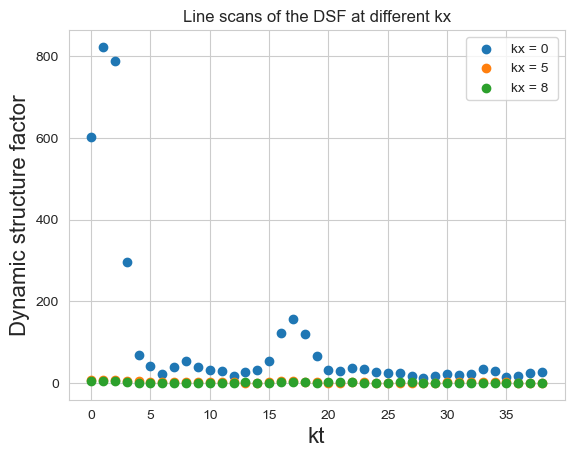

In [39]:
plt.scatter(range(0,39),ssf[38:,512])
plt.scatter(range(0,39),ssf[38:,517])
plt.scatter(range(0,39),ssf[38:,520])
plt.title('Line scans of the DSF at different kx')
plt.xlabel('kt', fontsize = 16)
plt.ylabel('Dynamic structure factor', fontsize = 16)
plt.legend(['kx = 0 ', 'kx = 5', 'kx = 8'])

plt.show()


In [27]:
t = 0
C = intensity_at_membrane[ t,:,:]
C[np.isnan(C)] = 0

h,x_lag,y_lag = spatial_autocorr(C, np.arange(surface.shape[1]), np.arange(surface.shape[0]))

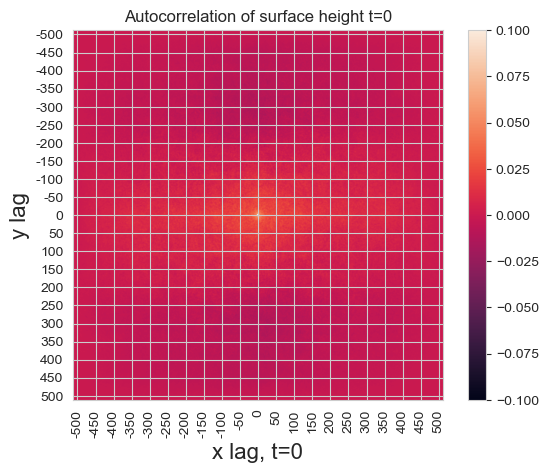

In [28]:
normalization_factor = np.linalg.norm(C-np.mean(C), 'fro')**2
hn = h/normalization_factor
plt.imshow(hn,vmin = -0.1, vmax=0.1)
plt.colorbar()
plt.xlabel('x lag, t=%d'%t, fontsize = 16)
plt.xticks(gu.yuval_ticks(x_lag)[0], gu.yuval_ticks(x_lag)[1], rotation = 90)
plt.yticks(gu.yuval_ticks(y_lag)[0], gu.yuval_ticks(y_lag)[1])
plt.ylabel('y lag', fontsize = 16)
plt.title('Autocorrelation of surface height t=%d'%t)
plt.show()


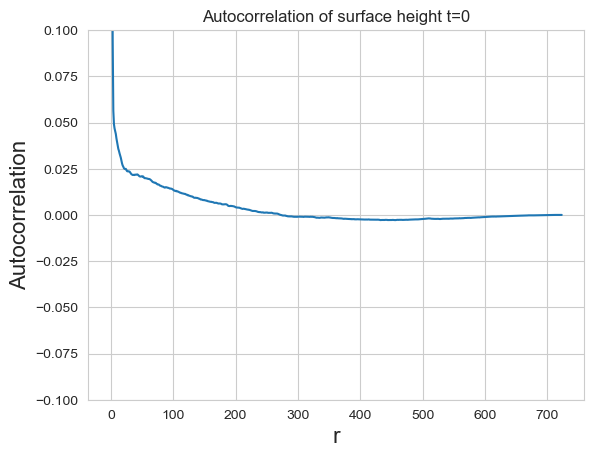

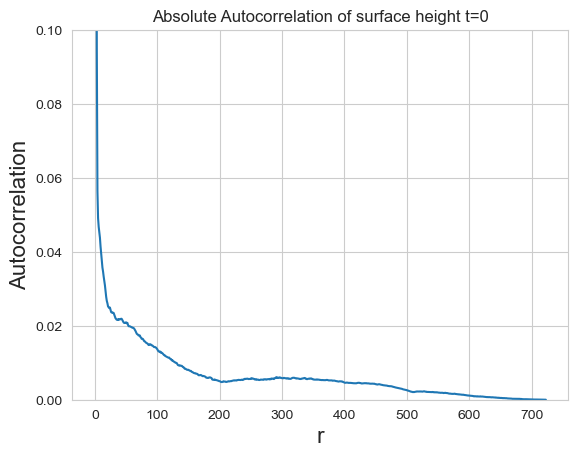

In [29]:
import utils.graph_utils as gu  

r = gu.xy_matrix_to_r(hn, 512,512)
plt.plot(r)
plt.ylim([-0.1,0.1])
plt.title('Autocorrelation of surface height t=%d'%t)
plt.xlabel('r', fontsize = 16)
plt.ylabel('Autocorrelation', fontsize = 16)
plt.show()
r = gu.xy_matrix_to_r(np.abs(hn), 512,512)
plt.plot(r)
plt.ylim([0,0.1])
plt.title('Absolute Autocorrelation of surface height t=%d'%t)
plt.xlabel('r', fontsize = 16)
plt.ylabel('Autocorrelation', fontsize = 16)
plt.show()


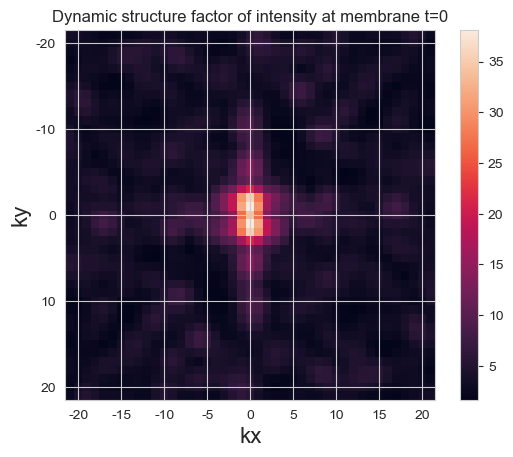

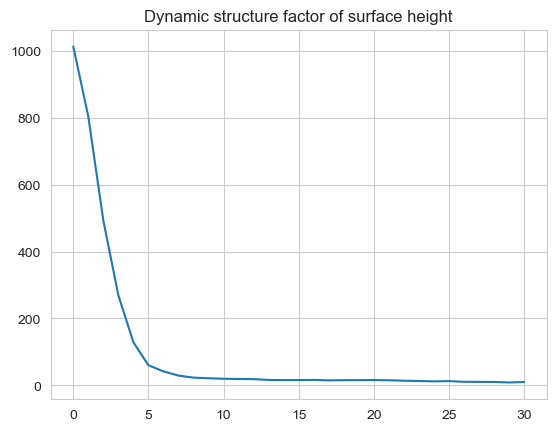

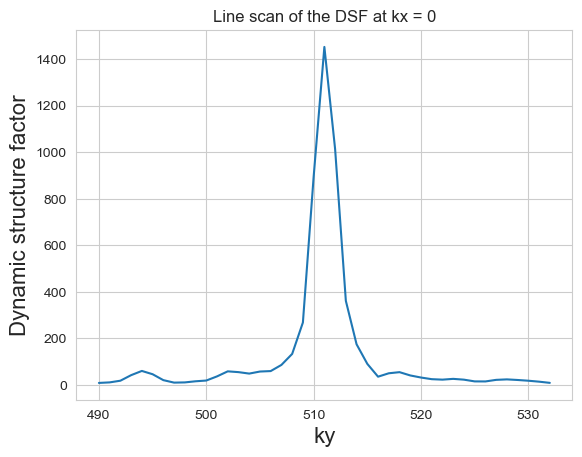

In [59]:

ssf,kx,ky = static_structure_factor(hn, x_lag)
#ssf_radial, kr = static_structure_factor_radial(ssf, kx,ky)


plt.imshow(np.sqrt(ssf[490:-490,490:-490]))
plt.colorbar()
plt.xlabel('kx', fontsize = 16)
plt.ylabel('ky' , fontsize = 16)
xticks, xlabels = gu.yuval_ticks(range(-21,21), gap=5)
yticks, ylabels = gu.yuval_ticks(range(-21,21), gap=10)
plt.xticks(xticks, xlabels)
plt.yticks(yticks, ylabels)

plt.title('Dynamic structure factor of intensity at membrane t=%d'%t)
plt.show()


plt.plot(gaussian_filter(gu.xy_matrix_to_r(np.abs(ssf[490:532,490:532]), 22,22),0))
#plt.ylim([0,10])
plt.title('Dynamic structure factor of surface height')
plt.show()

plt.plot(np.arange(490,533), ssf[512,490:-490])
plt.title('Line scan of the DSF at kx = 0')
plt.xlabel('ky', fontsize = 16)
plt.ylabel('Dynamic structure factor', fontsize = 16)
plt.show()

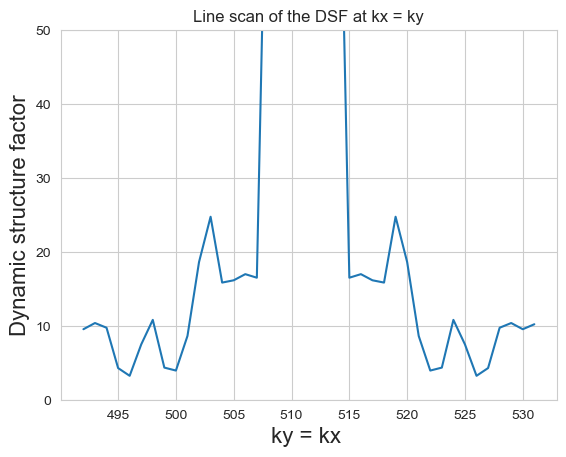

In [50]:

x = np.arange(492,532)
y = [ssf[x0, x0] for x0 in x]
plt.plot(x,y)
plt.ylim([0,50])
plt.title('Line scan of the DSF at kx = ky')
plt.xlabel('ky = kx ', fontsize = 16)
plt.ylabel('Dynamic structure factor', fontsize = 16)
plt.show()


In [30]:
#reload gu
from importlib import reload
reload(gu)

<module 'utils.graph_utils' from 'C:\\Users\\amityu\\DataspellProjects\\gel_sheets\\utils\\graph_utils.py'>

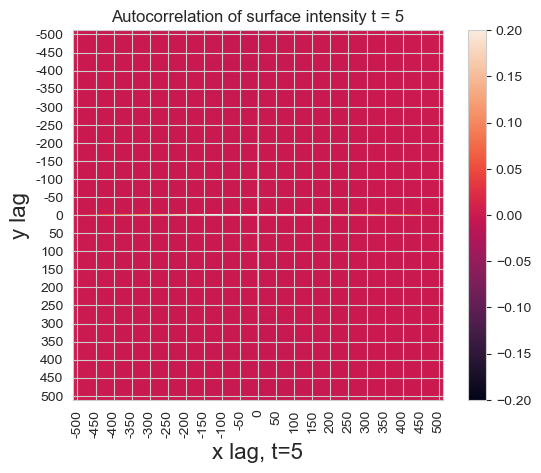

In [52]:
D = intensity[t,:,:]
D[np.isnan(D)] = 0
h,x_lag,y_lag = spatial_autocorr(D, np.arange(surface.shape[1]), np.arange(surface.shape[0]))
normalization_factor = np.linalg.norm(D-np.mean(D), 'fro')**2
hn = h/normalization_factor
plt.imshow(hn, vmin = -0.2, vmax=0.2)
plt.colorbar()
plt.xlabel('x lag, t=%d'%t, fontsize = 16)
plt.ylabel('y lag', fontsize = 16)
plt.xticks(gu.yuval_ticks(x_lag)[0], gu.yuval_ticks(x_lag)[1], rotation = 90)
plt.yticks(gu.yuval_ticks(y_lag)[0], gu.yuval_ticks(y_lag)[1])
plt.title('Autocorrelation of surface intensity t = %d' %t)
plt.show()


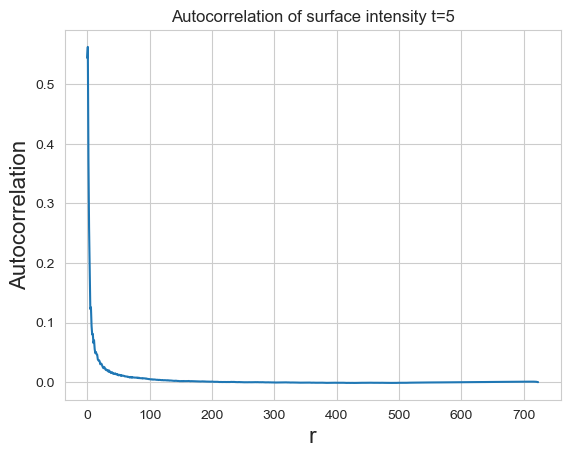

In [53]:
import utils.graph_utils as gu

r = gu.xy_matrix_to_r(hn, 512,512)
plt.plot(r)
plt.title('Autocorrelation of surface intensity t=%d'%t)
plt.xlabel('r', fontsize = 16)
plt.ylabel('Autocorrelation', fontsize = 16)
plt.show()
